In [26]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
apple_stock = "data/Apple_Stock_onemonth.csv"
df = pd.read_csv(apple_stock)
print(df)
time_elapsed = 29
close = df['Close/Last'].to_numpy()
volume = df['Volume'].to_numpy()
open = df['Open'].to_numpy()
high = df['High'].to_numpy()
low = df['Low'].to_numpy()
for i in range(close.size):
  close[i] = float(close[i][1:])
  open[i] = float(open[i][1:])
  high[i] = float(high[i][1:])
  low[i] = float(low[i][1:])
close_data = pd.DataFrame(close)

In [36]:
total_growth = close[0] / close[-1]

number_of_years = time_elapsed/365.0
cagr = total_growth ** (1/number_of_years) - 1
std_dev = close_data.pct_change().std()
number_of_trading_days = 252
std_dev = std_dev * math.sqrt(number_of_trading_days)
print ("cagr (mean returns) : ", str(round(cagr,4)))
print ("std_dev (standard deviation of return : )", str(round(std_dev,4)))

cagr (mean returns) :  -0.1825
std_dev (standard deviation of return : ) 0    0.3832
dtype: float64


In [41]:
daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days), number_of_trading_days)+1

In [ ]:
print(daily_return_percentages)

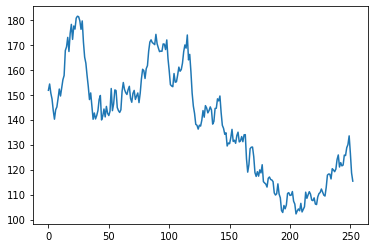

In [43]:
price_series = [close[-1]]
for j in daily_return_percentages:
    price_series.append(price_series[-1] * j)

#Great, now we can plot of single 'random walk' of stock prices
plt.plot(price_series)
plt.show()

In [ ]:
number_of_trials = 3000
closing_prices = []
for i in range(number_of_trials):
    #calculate randomized return percentages following our normal distribution
    #and using the mean / std dev we calculated above
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/math.sqrt(number_of_trading_days),number_of_trading_days)+1
    price_series = [close[-1]]

    for j in daily_return_percentages:
        #extrapolate price out for next year
        price_series.append(price_series[-1] * j)

    #append closing prices in last day of window for histogram
    closing_prices.append(price_series[-1])

    #plot all random walks
    plt.plot(price_series)

plt.show()
plt.hist(closing_prices,bins=40)

plt.show()

In [46]:
mean_end_price = round(np.mean(closing_prices),2)
print("Expected price: ", str(mean_end_price))

Expected price:  127.1


In [ ]:
top_ten = np.percentile(closing_prices,100-10)

#Pull bottom 10% of possible outcomes
bottom_ten = np.percentile(closing_prices,10);

#create histogram again
plt.hist(closing_prices,bins=40)
#append w/ top 10% line
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
#append w/ bottom 10% line
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
#append with current price
plt.axvline(close[-1],color='g', linestyle='dashed',linewidth=2)

plt.show()